<a href="https://colab.research.google.com/github/HardikNickam/colab-eda/blob/main/TimeSeries%2CETS%2CEWMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas_datareader as pdr

In [18]:
!pip install yfinance
import yfinance as yf
df_tesla = yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed


In [19]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-09-12,224.660004,231.449997,223.830002,229.809998,229.809998,72020000
2024-09-13,228.000000,232.669998,226.320007,230.289993,230.289993,59515100
2024-09-16,229.300003,229.960007,223.529999,226.779999,226.779999,54323000


### **simple moving average**

smothening of the graph


<Axes: xlabel='Date'>

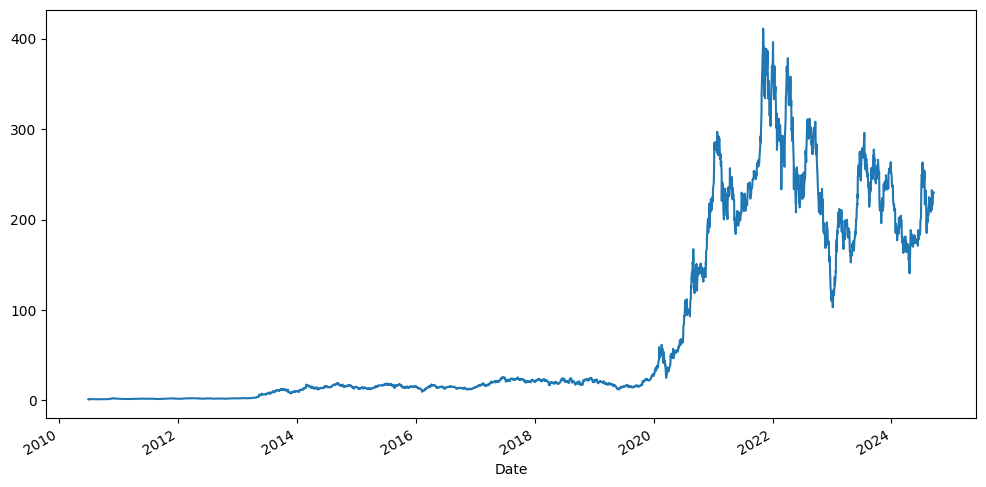

In [20]:
df_tesla['Open'].plot(figsize=(12,6))

In [21]:
df_tesla['Open 10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<Axes: xlabel='Date'>

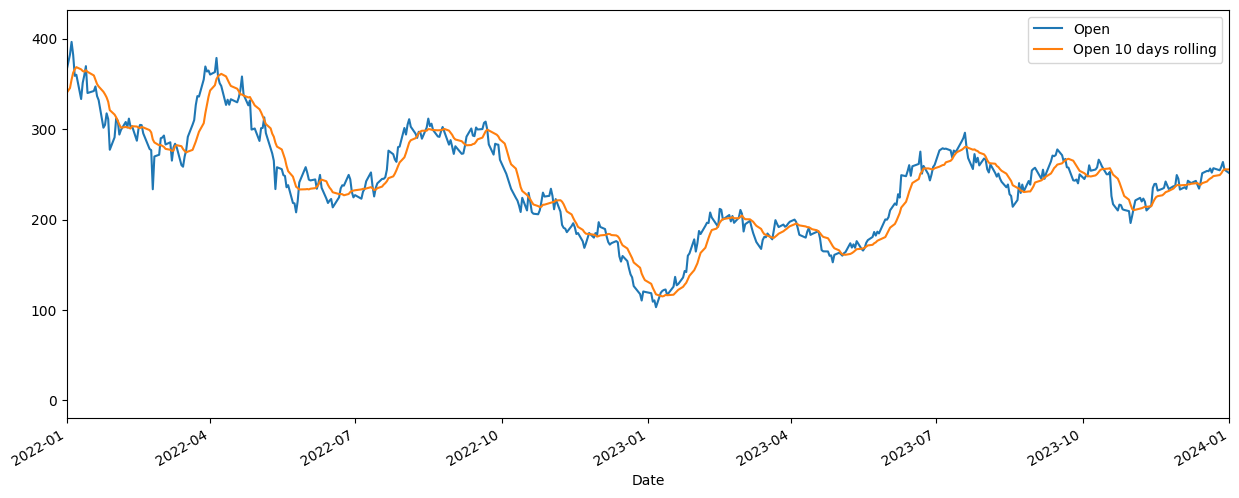

In [22]:
df_tesla[['Open','Open 10 days rolling']].plot(xlim=['2022-01-01','2024-01-01'],figsize=(15,6))

<Axes: xlabel='Date'>

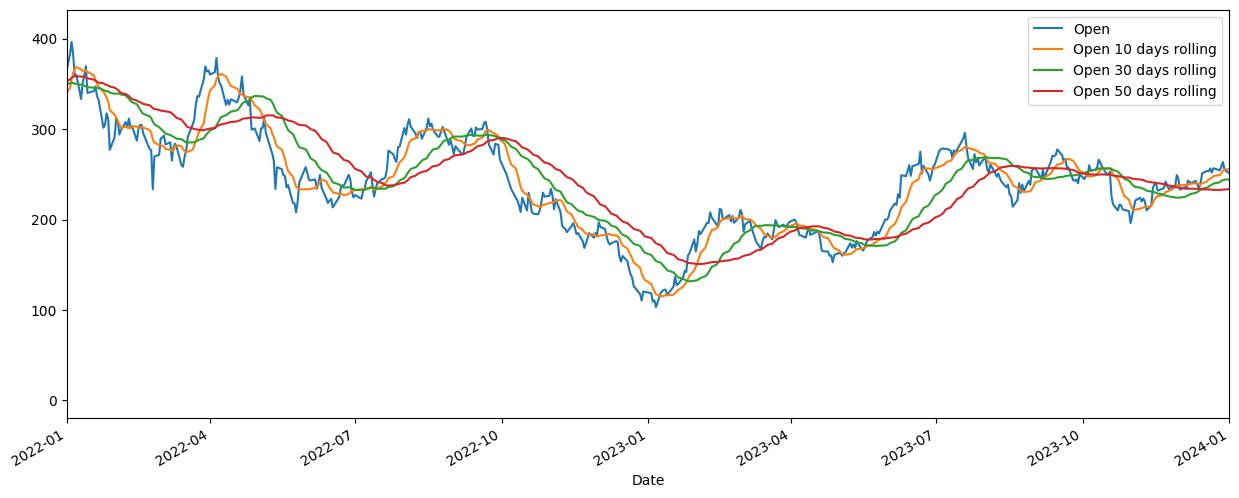

In [23]:
df_tesla['Open 30 days rolling'] = df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open 50 days rolling'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()
df_tesla[['Open','Open 10 days rolling','Open 30 days rolling','Open 50 days rolling']].plot(xlim=['2022-01-01','2024-01-01'],figsize=(15,6))

CMA(cummulative moving avg)

<Axes: xlabel='Date'>

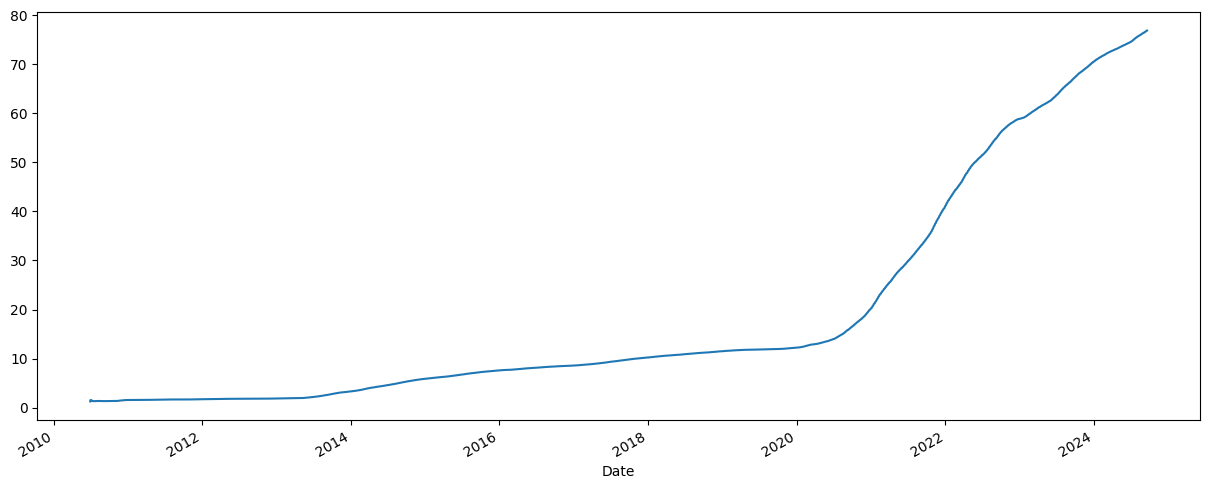

In [24]:
##expanding
## cummulative moving avg
df_tesla['Open'].expanding().mean().plot(figsize=(15,6))


<Axes: xlabel='Date'>

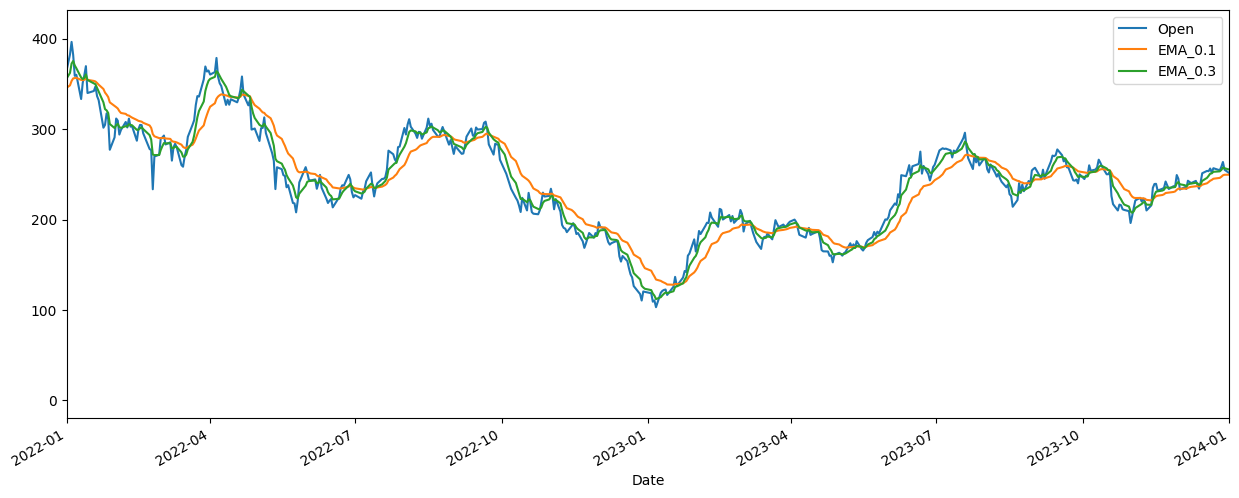

In [30]:
## exponential moving average
df_tesla['EMA_0.1']=df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()
df_tesla['EMA_0.3']=df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean() ## alpha is smoothning parameter
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2022-01-01','2024-01-01'],figsize=(15,6))

<Axes: xlabel='Date'>

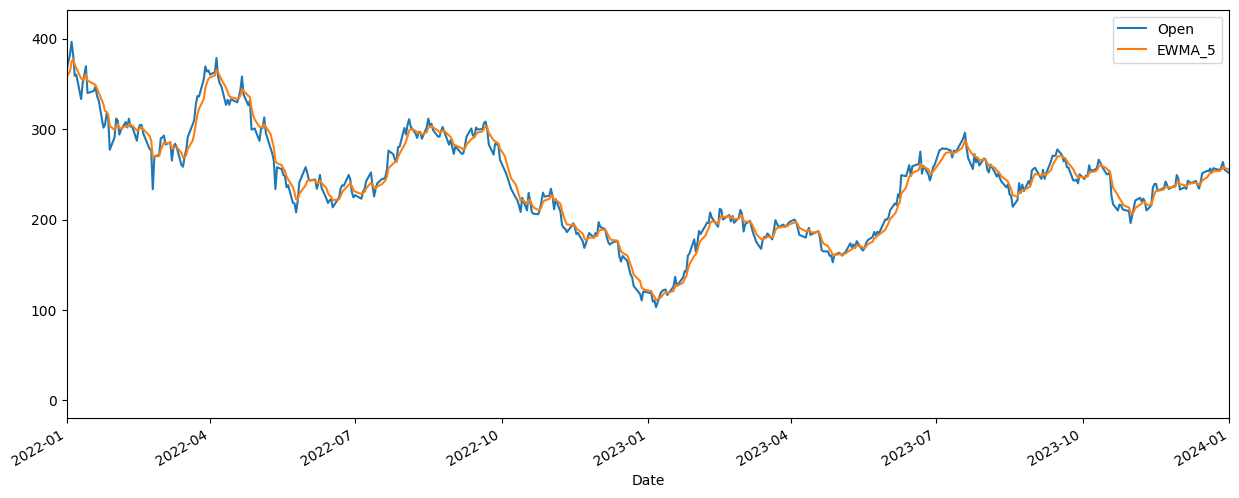

In [36]:
##exponential weight moving average

df_tesla['EWMA_5']=df_tesla['Open'].ewm(span=5).mean() # Changed ewma to ewm
df_tesla[['Open','EWMA_5']].plot(xlim=['2022-01-01','2024-01-01'],figsize=(15,6))